In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
all_df = pd.read_csv('train_1.csv')
all_df.shape

(145063, 551)

In [3]:
# For now, just set all NaN to 0.

all_df.fillna(0, inplace = True)


In [4]:
all_df[:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
# Test of using regular expression to find info inside Page
pageStr = all_df.Page[4]
print(pageStr)

urlRegEx = '[^._]+[.]\w*wiki\w*[.][^_]+'
midSplit = re.split('[_](' + urlRegEx + ')[_]', pageStr)
print(midSplit)

pageInfo = midSplit[:2]
midSplit = re.split('[_]', midSplit[2])
pageInfo.extend(midSplit)
print(pageInfo)

52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider
['52_Hz_I_Love_You', 'zh.wikipedia.org', 'all-access_spider']
['52_Hz_I_Love_You', 'zh.wikipedia.org', 'all-access', 'spider']


In [6]:
# Extract info from page

pageInfo = []

for pageStr in all_df.Page.values:
    midSplit = re.split('[_](' + urlRegEx + ')[_]', pageStr)
    thisPageInfo = midSplit[:2]
    midSplit = re.split('[_]', midSplit[2])
    thisPageInfo.extend(midSplit)
    
    pageInfo.append(thisPageInfo)
    
# Do a transpose

pageInfo = [[pageInfo[j][i] for j in range(len(pageInfo))] for i in range(len(pageInfo[0]))]

toInfoIndex = {'name' : 0, 'project' : 1, 'access' : 2, 'agent' : 3}
for colname in toInfoIndex:
    all_df[colname] = pageInfo[toInfoIndex[colname]]

all_df[list(toInfoIndex)][:5]

,agent,project,name,access
0,spider,zh.wikipedia.org,2NE1,all-access
1,spider,zh.wikipedia.org,2PM,all-access
2,spider,zh.wikipedia.org,3C,all-access
3,spider,zh.wikipedia.org,4minute,all-access
4,spider,zh.wikipedia.org,52_Hz_I_Love_You,all-access


In [7]:
# Check on the values for project.

all_df['project'].value_counts()

en.wikipedia.org               24108
ja.wikipedia.org               20431
de.wikipedia.org               18547
fr.wikipedia.org               17802
zh.wikipedia.org               17229
ru.wikipedia.org               15022
es.wikipedia.org               14069
commons.wikimedia.org          10552
www.mediawiki.org               7300
en.wikipedia_page_views.jpg        3
Name: project, dtype: int64

In [8]:
avg_df = all_df.groupby('project').mean()

avg_df

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
project,,,,,,,,,,,,,,,,,,,,,
commons.wikimedia.org,108.114196,111.649924,109.035917,90.155136,100.268764,114.675796,119.582259,132.395660,114.843537,109.968537,...,189.939253,227.303544,189.085481,228.799848,252.011657,218.476118,246.305440,218.848844,237.505970,206.341926
de.wikipedia.org,714.968405,705.229741,676.877231,621.145145,722.076185,794.832480,770.814256,782.077641,752.939990,701.702593,...,828.738017,839.025934,810.756187,1281.088532,1206.478029,1085.095379,1032.640804,994.657141,949.265649,893.013425
en.wikipedia.org,3513.862203,3502.511407,3325.357889,3462.054256,3575.520035,3849.736021,3643.523063,3437.871080,3517.459391,3497.571594,...,4997.991248,4683.314294,4971.831757,5140.463373,5770.371661,6040.680728,5860.227559,6245.127510,5201.783018,5127.916418
en.wikipedia_page_views.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.666667,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
es.wikipedia.org,1085.972919,1037.814557,954.412680,896.050750,974.508210,1110.637145,1082.568342,1050.669557,1030.841282,937.129931,...,983.568129,935.082522,880.307911,903.643685,1195.481626,1133.367901,1178.290923,1112.171085,821.671405,787.399531
fr.wikipedia.org,475.150994,478.202000,459.837659,491.508932,482.557746,502.741209,485.945399,476.998820,472.061903,445.495057,...,652.004719,639.459443,618.215931,666.639085,936.884788,858.413100,774.155769,752.712954,700.543422,646.258342
ja.wikipedia.org,580.647056,666.672801,602.289805,756.509177,725.720914,632.399148,615.184181,611.462337,596.067642,619.299300,...,675.104792,968.007733,856.605012,818.374725,779.114728,789.158680,790.500465,865.483236,952.018354,1197.239440
ru.wikipedia.org,629.999601,640.902876,594.026295,558.728132,595.029157,640.986287,626.293436,623.360205,638.550726,731.252297,...,896.352017,884.841299,874.274597,1120.990347,1112.840833,1001.209426,931.987685,897.282452,803.271868,880.244508
www.mediawiki.org,47.905890,52.558904,44.618356,42.295342,46.367808,53.684247,59.357808,51.004521,45.432192,54.700822,...,47.134795,74.737945,69.994795,71.513836,41.303699,43.837945,99.977534,43.930822,59.138219,53.826027


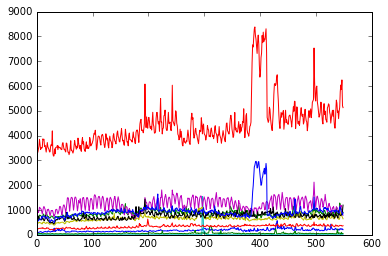

In [9]:
plt.plot(avg_df.values.T)
plt.show()

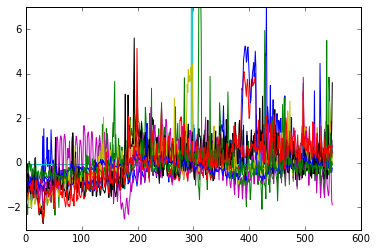

In [10]:
# Now graph with normalization.

X_graph = avg_df.values
means = np.mean(X_graph, axis = 1).reshape(-1,1)
stdevs = np.std(X_graph, axis = 1).reshape(-1,1)
X_graph = (X_graph - means) / stdevs

plt.plot(X_graph.T)
plt.ylim((-3, 7))
plt.show()

In [11]:
groupCols = ['project', 'access', 'agent']
avg_df = all_df.groupby(groupCols).mean()

avg_df

2015-07-01  \
project                     access                agent                     
commons.wikimedia.org       all-access            all-agents   216.967843   
                                                  spider        10.094939   
                            desktop               all-agents   176.876378   
                            mobile-web            all-agents    38.638860   
de.wikipedia.org            all-access            all-agents  1455.569560   
                                                  spider         7.717680   
                            desktop               all-agents   705.628448   
                            mobile-web            all-agents   691.964512   
en.wikipedia.org            all-access            all-agents  4486.210850   
                                                  spider        56.321030   
                            desktop               all-agents  4766.932261   
                            mobile-web            all-agents  3860.205520   
en.wikipedia_page_views.jpg commons.wikimedia.org all-access     0.000000   
                                                  desktop        0.000000   
es.wikipedia.org            all-access            all-agents  2140.014136   
                                                  spider        32.446424   
                            desktop               all-agents  1117.296024   
                            mobile-web            all-agents  1057.987114   
fr.wikipedia.org            all-access            all-agents   933.572127   
                                                  spider         9.979778   
                            desktop               all-agents   455.970843   
                            mobile-web            all-agents   497.955004   
ja.wikipedia.org            all-access            all-agents  1171.749700   
                                                  spider         7.237468   
                            desktop               all-agents   456.195793   
                            mobile-web            all-agents   705.070428   
ru.wikipedia.org            all-access            all-agents  1255.079904   
                                                  spider        13.460449   
                            desktop               all-agents   774.811237   
                            mobile-web            all-agents   473.510324   
www.mediawiki.org           all-access            all-agents    95.824772   
                                                  spider         7.767867   
                            desktop               all-agents    89.735849   
                            mobile-web            all-agents     7.631954   
zh.wikipedia.org            all-access            all-agents   475.589559   
                                                  spider        15.297216   
                            desktop               all-agents   304.096275   
                            mobile-web            all-agents   168.451382   

                                                               2015-07-02  \
project                     access                agent                     
commons.wikimedia.org       all-access            all-agents   220.038824   
                                                  spider        17.323656   
                            desktop               all-agents   182.086614   
                            mobile-web            all-agents    37.889804   
de.wikipedia.org            all-access            all-agents  1433.942652   
                                                  spider         8.528668   
                            desktop               all-agents   677.910776   
                            mobile-web            all-agents   701.142374   
en.wikipedia.org            all-access            all-agents  4475.706338   
                                                  spider        52.084364   
                            desktop               all-agen

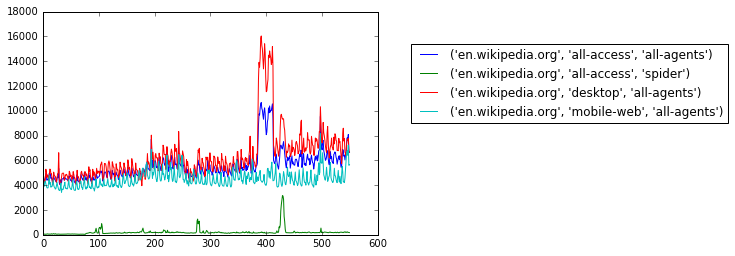

2015-07-01   2015-07-02   2015-07-03  \
project          access     agent                                               
en.wikipedia.org all-access all-agents  4486.210850  4475.706338  4254.993418   
                            spider        56.321030    52.084364    49.125127   
                 desktop    all-agents  4766.932261  4743.588543  4238.542714   
                 mobile-web all-agents  3860.205520  3852.328246  3922.425047   

                                         2015-07-04   2015-07-05   2015-07-06  \
project          access     agent                                               
en.wikipedia.org all-access all-agents  4447.098312  4596.951587  4935.692749   
                            spider        50.716893    48.091665    44.893936   
                 desktop    all-agents  4235.251658  4407.578090  5288.750151   
                 mobile-web all-agents  4234.899226  4335.168095  4136.993937   

                                         2015-07-07   2015-07-08   2015-07-09  \
project          access     agent                                               
en.wikipedia.org all-access all-agents  4657.117953  4395.142690  4497.205648   
                            spider        54.236260    62.116609    71.149868   
                 desktop    all-agents  5034.122412  4631.702714  4830.167035   
                 mobile-web all-agents  3901.413757  3791.204056  3775.624085   

                                         2015-07-10     ...        2016-12-22  \
project          access     agent                       ...                     
en.wikipedia.org all-access all-agents  4471.923134     ...       6427.210957   
                            spider        64.062259     ...        240.154330   
                 desktop    all-agents  4772.820905     ...       7765.799196   
                 mobile-web all-agents  3792.125653     ...       4209.621785   

                                         2016-12-23   2016-12-24   2016-12-25  \
project          access     agent                                               
en.wikipedia.org all-access all-agents  6034.165198  6438.158403  6656.846056   
                            spider       204.711215   233.326911   184.130400   
                 desktop    all-agents  6664.179095  6579.879196  6382.077186   
                 mobile-web all-agents  4579.932469  5296.774409  5972.543801   

                                         2016-12-26   2016-12-27   2016-12-28  \
project          access     agent                                               
en.wikipedia.org all-access all-agents  7457.215309  7823.094915  7615.602930   
                            spider       212.030825   241.538025   197.852160   
                 desktop    all-agents  7315.324623  7705.578090  7613.645226   
                 mobile-web all-agents  6571.888982  6777.487978  6417.208447   

                                         2016-12-29   2016-12-30   2016-12-31  
project          access     agent                                              
en.wikipedia.org all-access all-agents  8088.485083  6772.396433  6641.334961  
                            spider       196.750760   191.628473   179.278037  
                 desktop    all-agents  7794.757789  6807.862111  6673.631960  
                 mobile-web all-agents  7238.761238  5603.459962  5641.592306  

[4 rows x 550 columns]

In [12]:
# Look at breaking down averages of english data for all possible info parameters.

en_df = all_df[all_df.project == 'en.wikipedia.org'].copy()
groupCols = ['project', 'access', 'agent']
avg_df = en_df.groupby(groupCols).mean()

plt.plot(avg_df.values.T)
plt.legend(avg_df.index, loc = (1.1,0.5))
plt.show()

avg_df

In [13]:
en_df['name']

8357                                                 !vote
8358                                    "Awaken,_My_Love!"
8359         "European_Society_for_Clinical_Investigation"
8360                                   "Weird_Al"_Yankovic
8361                                            100_metres
8362                                   10_Cloverfield_Lane
8363                                   10_Gigabit_Ethernet
8364             13_Hours:_The_Secret_Soldiers_of_Benghazi
8365                                                  1551
8366                                  1896_Summer_Olympics
8367                                     1918_flu_pandemic
8368                        1923_San_Pedro_Maritime_Strike
8369                                  1936_Summer_Olympics
8370                                  1976_Summer_Olympics
8371                                  1980_Summer_Olympics
8372                                  1984_Summer_Olympics
8373                             1989_(Taylor_Swift_albu

In [14]:
# Check if name contains a 4 digit number, perhaps related to name containing a year.

hasFourDigit = []
for name in en_df['name']:
    thisHave = re.match(r'(\b|\D)\d\d\d\d(\b|\D)', name)
    if thisHave == None:
        hasFourDigit.append(False)
    else:
        hasFourDigit.append(True)
        
en_df['nameHasYear'] = hasFourDigit

[ [x, y] for (x,y) in zip(en_df['name'].values, hasFourDigit)][:20]

[['!vote', False],
 ['"Awaken,_My_Love!"', False],
 ['"European_Society_for_Clinical_Investigation"', False],
 ['"Weird_Al"_Yankovic', False],
 ['100_metres', False],
 ['10_Cloverfield_Lane', False],
 ['10_Gigabit_Ethernet', False],
 ['13_Hours:_The_Secret_Soldiers_of_Benghazi', False],
 ['1551', True],
 ['1896_Summer_Olympics', True],
 ['1918_flu_pandemic', True],
 ['1923_San_Pedro_Maritime_Strike', True],
 ['1936_Summer_Olympics', True],
 ['1976_Summer_Olympics', True],
 ['1980_Summer_Olympics', True],
 ['1984_Summer_Olympics', True],
 ['1989_(Taylor_Swift_album)', True],
 ['1999_(Prince_album)', True],
 ['2000_Summer_Olympics', True],
 ['2002_FIFA_World_Cup', True]]

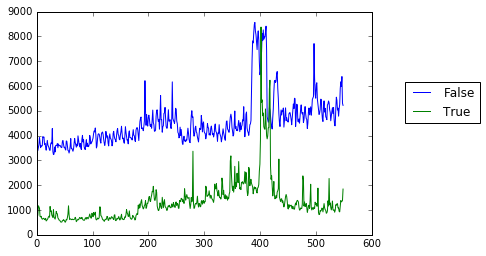

In [15]:
# Plot average behavior for when title contains year.

avg_df = en_df.groupby('nameHasYear').mean()
plt.plot(avg_df.values.T)
plt.legend(avg_df.index, loc = (1.1, 0.5))
plt.show()

In [16]:
# Now check number of words in name, counted by the number of '_' in name.

numWords = []
for name in en_df['name']:
    thisWords = re.split('_', name)
    numWords.append(len(thisWords))

en_df['numWords'] = numWords

[[x,y] for (x,y) in zip(en_df['name'], numWords)][:10]

[['!vote', 1],
 ['"Awaken,_My_Love!"', 3],
 ['"European_Society_for_Clinical_Investigation"', 5],
 ['"Weird_Al"_Yankovic', 3],
 ['100_metres', 2],
 ['10_Cloverfield_Lane', 3],
 ['10_Gigabit_Ethernet', 3],
 ['13_Hours:_The_Secret_Soldiers_of_Benghazi', 7],
 ['1551', 1],
 ['1896_Summer_Olympics', 3]]

In [17]:
# Look at counts for numWords

en_df['numWords'].value_counts()

2     12099
3      4294
1      2419
4      2327
5      1410
6       815
7       383
8       185
9       100
10       43
11       23
12       10
Name: numWords, dtype: int64

In [24]:
# For simplicity, set num words at least 4 as 4.

simple_df = en_df.copy()
simple_df[simple_df['numWords'] > 4] = 4

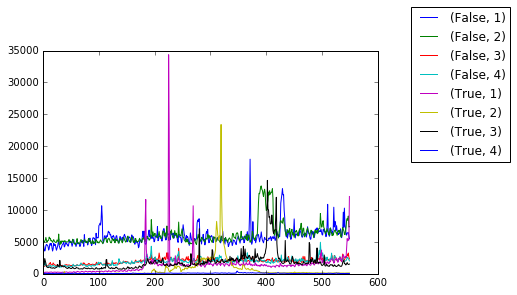

In [25]:
# Look at breakdown by year and numWords.

avg_df = simple_df.groupby(['nameHasYear', 'numWords']).mean()
plt.plot(avg_df.values.T)
plt.legend(avg_df.index, loc = (1.1, 0.5))
plt.show()

In [20]:
dropCols = [name for name in toInfoIndex]
dropCols.append('Page')

Y_en = all_df[all_df.project == 'en.wikipedia.org'].drop(dropCols, 1).values

Y_en.shape

(24108, 550)